# Eleonora Bacchi Assignment

## Week 1

The marketing department of Turtle Games prefers Python for data analysis. As you are fluent in Python, they asked you to assist with data analysis of social media data. The marketing department wants to better understand how users accumulate loyalty points. 

## 1. Load and explore the data

In [1]:
# Imports
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols
import sklearn

from sklearn import datasets 
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [2]:
# Load the CSV file(s) as reviews.
rev = pd.read_csv('turtle_reviews.csv')

# View the DataFrame.
rev.head()

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap


In [3]:
rev.tail()

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
1995,Female,37,84.46,69,4031,PhD,EN,Web,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Female,43,92.66,8,539,PhD,EN,Web,979,Great game. Did not think I would like it whe...,Super fun
1997,Male,34,92.66,91,5614,graduate,EN,Web,1012,Great game for all.........\nKeeps the mind ni...,Great Game
1998,Male,34,98.40,16,1048,PhD,EN,Web,1031,fun game!,Four Stars
1999,Male,32,92.66,8,479,PhD,EN,Web,453,This game is fun. A lot like scrabble without ...,Love this game


In [4]:
# Explore the data.
rev.info()
print(rev.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB
(2000, 11)


In [5]:
# Check for missing values
rev.isnull().sum()

gender                    0
age                       0
remuneration (k£)         0
spending_score (1-100)    0
loyalty_points            0
education                 0
language                  0
platform                  0
product                   0
review                    0
summary                   0
dtype: int64

In [6]:
# Descriptive statistics.
rev.describe()

,age,remuneration (k£),spending_score (1-100),loyalty_points,product
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.495000,48.079060,50.000000,1578.032000,4320.521500
std,13.573212,23.123984,26.094702,1283.239705,3148.938839
min,17.000000,12.300000,1.000000,25.000000,107.000000
25%,29.000000,30.340000,32.000000,772.000000,1589.250000
50%,38.000000,47.150000,50.000000,1276.000000,3624.000000
75%,49.000000,63.960000,73.000000,1751.250000,6654.000000
max,72.000000,112.340000,99.000000,6847.000000,11086.000000


## 2. Drop columns

In [7]:
# Use ‘dropped.drop’ to remove irrelevant columns from the DataFrame. 
# Specify that ‘language’ and ‘platform’ are columns (i.e. ‘axis 1’). 
rev1 = rev.drop(['language', 'platform'], axis=1)  

# Check the DataFrame.
rev1.columns

Index(['gender', 'age', 'remuneration (k£)', 'spending_score (1-100)',
       'loyalty_points', 'education', 'product', 'review', 'summary'],
      dtype='object')

## 3. Rename columns

In [8]:
# Rename the column headers.
rev2 = rev1.rename(columns={"remuneration (k£)": "income_K£", "spending_score (1-100)": "spending_score"})

In [9]:
# View column names.
rev2.info()
rev2.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   income_K£       2000 non-null   float64
 3   spending_score  2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB


Index(['gender', 'age', 'income_K£', 'spending_score', 'loyalty_points',
       'education', 'product', 'review', 'summary'],
      dtype='object')

## 4. Save the DataFrame as a CSV file

In [10]:
# Create a CSV file as output.
rev2.to_csv('cleaned_reviews.csv', index=False)

In [11]:
# Import new CSV file with Pandas.
# Load the CSV file(s) as reviews.
c_rev = pd.read_csv('cleaned_reviews.csv')

# View DataFrame.
c_rev.head()

,gender,age,income_K£,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


## 5. Linear Regression

### 5a) spending vs. loyalty

In [12]:
# Independent variable.
X = c_rev['loyalty_points'].values.reshape(-1, 1) 

# Dependent variable.
y = c_rev['spending_score'].values.reshape(-1, 1)

# OLS model.
f = 'y ~ X'
test = ols(f, data = c_rev).fit()

# Print the regression table.
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Mon, 25 Jul 2022   Prob (F-statistic):          2.92e-263
Time:                        18:31:10   Log-Likelihood:                -8759.4
No. Observations:                2000   AIC:                         1.752e+04
Df Residuals:                    1998   BIC:                         1.753e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     28.4260      0.685     41.504      0.000      27.083      29.769
X              0.0137      0.000     40.595      0.000       0.013       0.014
==============================================================================
Omnibus:                      169.397   Durbin-Watson:                   2.599
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              212.607
Skew:                           0.768   Prob(JB):                     6.81e-47
Kurtosis:                       3.441   Cond. No.                     3.22e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.22e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

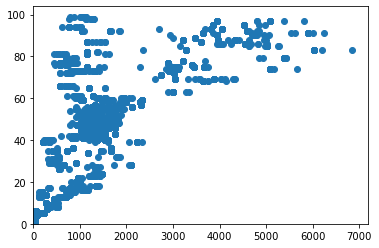

In [13]:
# Check for linearity.
plt.scatter(X, y)

plt.xlim(0)
plt.ylim(0)
plt.show()

In [14]:
# Extract the estimated parameters.
print("Parameters: ", test.params)

# Extract the standard errors.
print("Standard errors: ", test.bse)

# Extract the predicted values.
print("Predicted values: ", test.predict())

Parameters:  Intercept    28.426033
X             0.013671
dtype: float64
Standard errors:  Intercept    0.684905
X            0.000337
dtype: float64
Predicted values:  [ 31.29703545  35.58986696  28.97289101 ... 105.17748592  42.75370042
  34.97465225]


In [15]:
# Set the X coefficient and the constant to generate the regression table.
y_pred = 0.0136 * c_rev['loyalty_points'] + 28.426033

# View the output.
y_pred

0        31.282033
1        35.552433
2        28.970033
3        36.069233
4        33.403633
           ...    
1995     83.247633
1996     35.756433
1997    104.776433
1998     42.678833
1999     34.940433
Name: loyalty_points, Length: 2000, dtype: float64

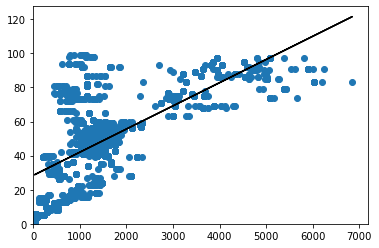

In [16]:
# Plot the graph with a regression line.
plt.scatter(X, y)

# Plot the regression line (in black).
plt.plot(X, y_pred, color='black') 

# Set the x and y limits on the axes:
plt.xlim(0)
plt.ylim(0)
plt.show()

### 5b) income vs. loyalty

In [17]:
# Independent variable.
X = c_rev['loyalty_points'].values.reshape(-1, 1) 

# Dependent variable.
y = c_rev['income_K£'].values.reshape(-1, 1)

# OLS model.
f = 'y ~ X'
test = ols(f, data = c_rev).fit()

# Print the regression table.
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Mon, 25 Jul 2022   Prob (F-statistic):          2.43e-209
Time:                        18:31:10   Log-Likelihood:                -8641.8
No. Observations:                2000   AIC:                         1.729e+04
Df Residuals:                    1998   BIC:                         1.730e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.5606      0.646     47.321      0.000      29.294      31.827
X              0.0111      0.000     34.960      0.000       0.010       0.012
==============================================================================
Omnibus:                      382.801   Durbin-Watson:                   1.461
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              657.257
Skew:                           1.230   Prob(JB):                    1.90e-143
Kurtosis:                       4.357   Cond. No.                     3.22e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.22e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

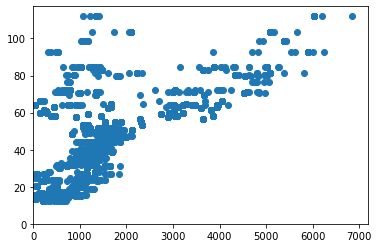

In [18]:
# Check for linearity.
plt.scatter(X, y)

plt.xlim(0)
plt.ylim(0)
plt.show()

In [19]:
# Extract the estimated parameters.
print("Parameters: ", test.params)

# Extract the standard errors.
print("Standard errors: ", test.bse)

# Extract the predicted values.
print("Predicted values: ", test.predict())

Parameters:  Intercept    30.560555
X             0.011101
dtype: float64
Standard errors:  Intercept    0.645817
X            0.000318
dtype: float64
Predicted values:  [32.89186761 36.3777352  31.00461446 ... 92.88431491 42.19491551
 35.87816819]


In [20]:
# Set the X coefficient and the constant to generate the regression table.
y_pred = 0.011101 * c_rev['loyalty_points'] + 30.5605

# View the output.
y_pred

0       32.891710
1       36.377424
2       31.004540
3       36.799262
4       34.623466
          ...    
1995    75.308631
1996    36.543939
1997    92.881514
1998    42.194348
1999    35.877879
Name: loyalty_points, Length: 2000, dtype: float64

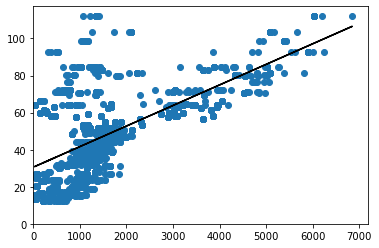

In [21]:
# Plot the graph with a regression line.
plt.scatter(X, y)

# Plot the regression line (in black).
plt.plot(X, y_pred, color='black') 

# Set the x and y limits on the axes:
plt.xlim(0)
plt.ylim(0)
plt.show()

### 5c) age vs. loyalty

In [22]:
# Independent variable.
X = c_rev['loyalty_points'].values.reshape(-1, 1) 

# Dependent variable.
y = c_rev['age'].values.reshape(-1, 1)

# OLS model.
f = 'y ~ X'
test = ols(f, data = c_rev).fit()

# Print the regression table.
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Mon, 25 Jul 2022   Prob (F-statistic):             0.0577
Time:                        18:31:11   Log-Likelihood:                -8051.8
No. Observations:                2000   AIC:                         1.611e+04
Df Residuals:                    1998   BIC:                         1.612e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     40.2035      0.481     83.615      0.000      39.261      41.146
X             -0.0004      0.000     -1.899      0.058      -0.001    1.47e-05
==============================================================================
Omnibus:                       99.357   Durbin-Watson:                   2.129
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              112.564
Skew:                           0.574   Prob(JB):                     3.61e-25
Kurtosis:                       2.814   Cond. No.                     3.22e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.22e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

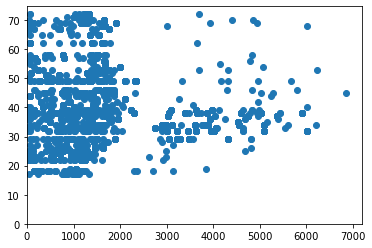

In [23]:
# Check for linearity.
plt.scatter(X, y)

plt.xlim(0)
plt.ylim(0)
plt.show()

In [24]:
# Extract the estimated parameters.
print("Parameters: ", test.params)

# Extract the standard errors.
print("Standard errors: ", test.bse)

# Extract the predicted values.
print("Predicted values: ", test.predict())

Parameters:  Intercept    40.203457
X            -0.000449
dtype: float64
Standard errors:  Intercept    0.480816
X            0.000236
dtype: float64
Predicted values:  [40.10917768 39.96820745 40.18549915 ... 37.683053   39.73295776
 39.98841019]


In [25]:
# Set the X coefficient and the constant to generate the regression table.
y_pred = -0.0004 * c_rev['loyalty_points'] + 40.203457

# View the output.
y_pred

0       40.119457
1       39.993857
2       40.187457
3       39.978657
4       40.057057
          ...    
1995    38.591057
1996    39.987857
1997    37.957857
1998    39.784257
1999    40.011857
Name: loyalty_points, Length: 2000, dtype: float64

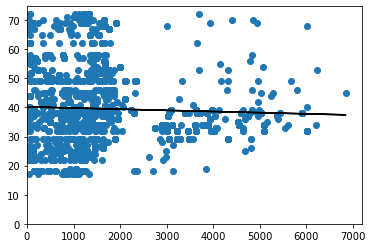

In [26]:
# Plot the graph with a regression line.
plt.scatter(X, y)

# Plot the regression line (in black).
plt.plot(X, y_pred, color='black') 

# Set the x and y limits on the axes:
plt.xlim(0)
plt.ylim(0)
plt.show()

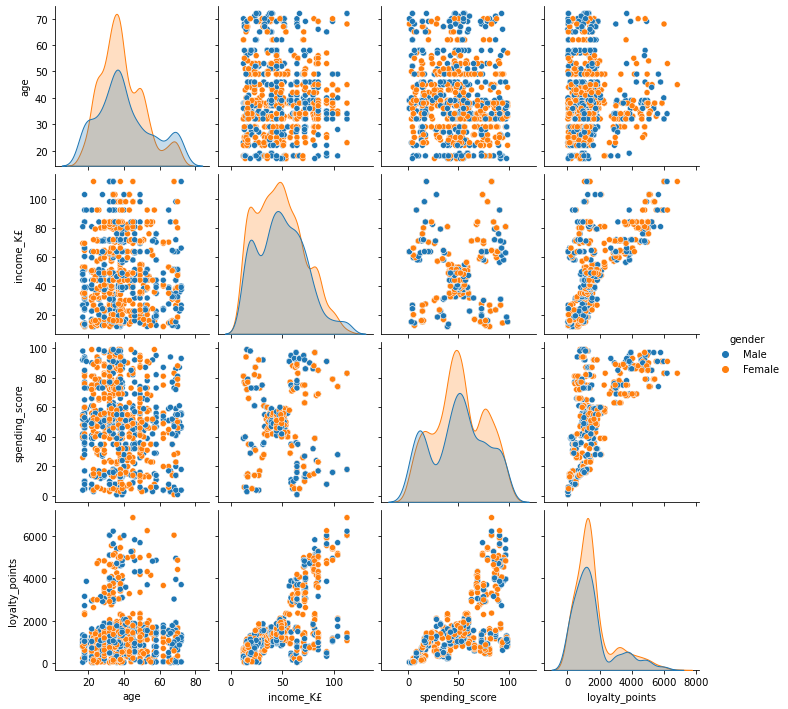

In [29]:
# Can use to review behaviour between classes, eg gender/education
var = c_rev[['age', 'income_K£', 'spending_score', 'loyalty_points']]

sns.pairplot(c_rev, vars=var, hue='gender', diag_kind= 'kde')

## Observations and insights

There is absolutely no relation between the age of the customers and their loyalty, this can be cleaarly seen in the graph and in the R-squared value.
Of the 3 models the best is the one about spending and loyalty but I am not satisfied by the R-squared value: what could be happening is that we obtain this result for the spending vs. loyalty because Turtle might be employing some shared parameters in calculating the customer loyalty points and their respective spending score.
What I notice is that there is a relation between the income and the spending (which makes sense) as the graphs present similar patterns for the data points. Therefore I wouldn't select these 2 parameters for a multilinear regression as there is a strong probability of multicollinearity.
By seeing the matter from another relative point of view, we could say that the spending and income present a relation with loyalty for less than 50% of the values, so at least there is some kind of influence.
As a result, I would consider other parameters such as products.
I have been instructed to drop the columns "language" and "platform" although it would be interesting to see if there is some cross-influence on loyalty, under the point of view of the user experience, for the platforms employed as to say: does the platform employed by users affects their experience? Does the user experience on a platform influence their spending nature and behaviour?

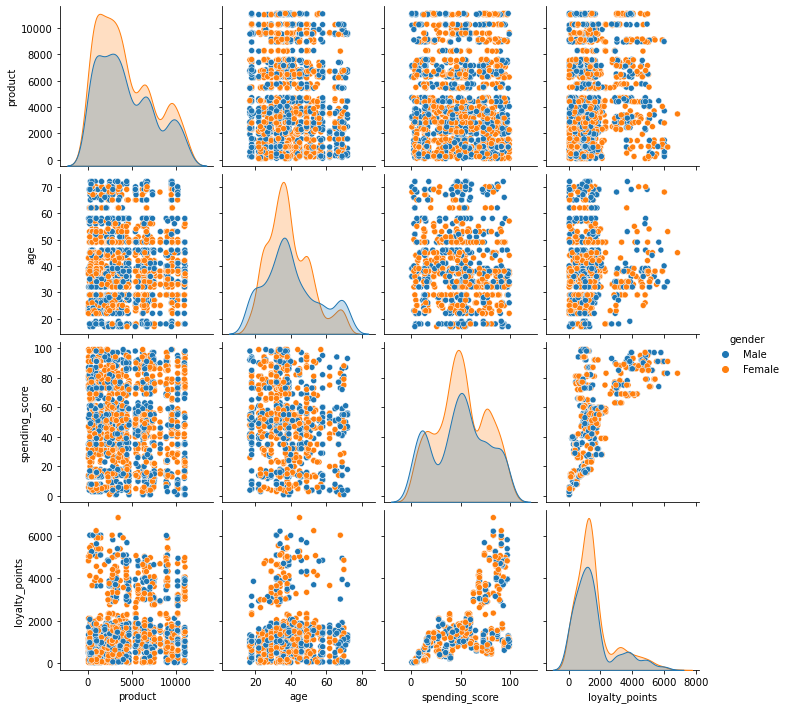

In [32]:
# Can use to review behaviour between classes.
var = c_rev[['product', 'age', 'spending_score', 'loyalty_points']]

sns.pairplot(c_rev, vars=var, hue='gender', diag_kind= 'kde')

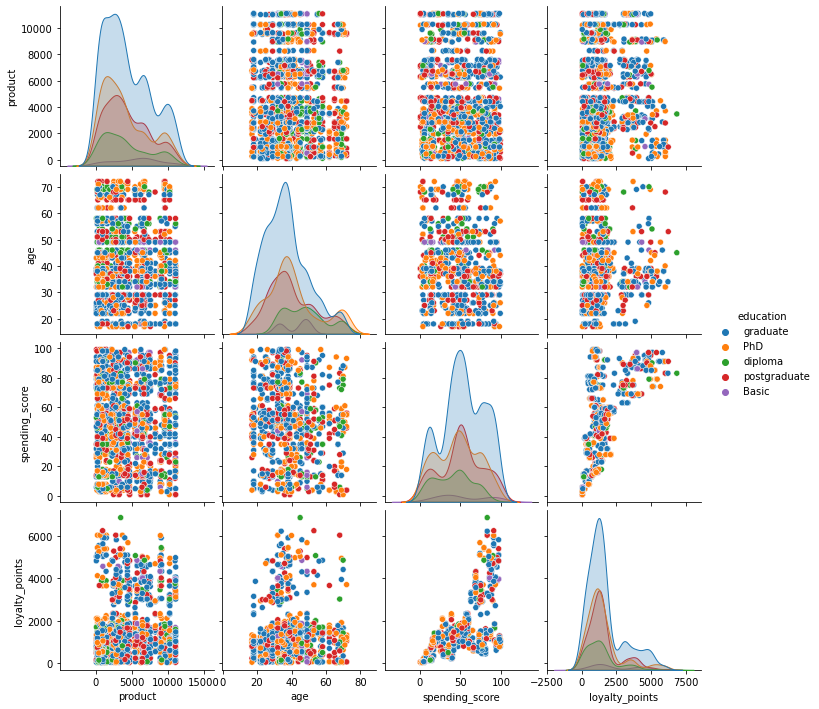

In [33]:
# Can use to review behaviour between classes.
var = c_rev[['product', 'age', 'spending_score', 'loyalty_points']]

sns.pairplot(c_rev, vars=var, hue='education', diag_kind= 'kde')